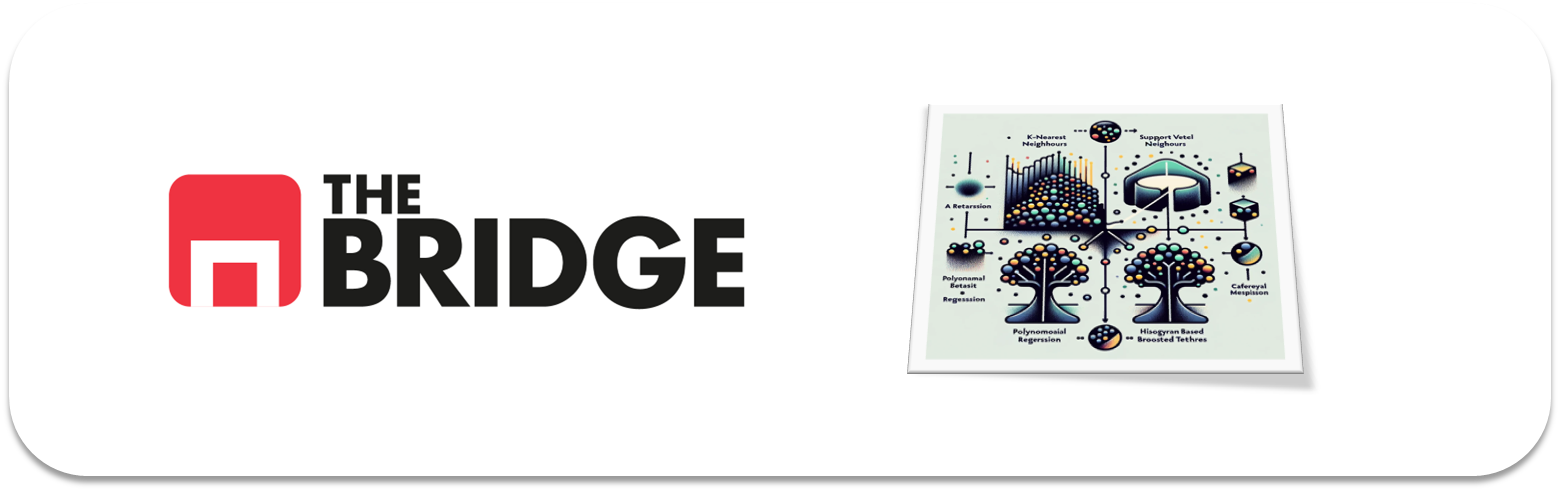

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, mean_squared_error, r2_score, ConfusionMatrixDisplay, \
    precision_recall_curve, roc_curve, auc, make_scorer, precision_score, recall_score, f1_score

import toolbox_ML as tb
from toolbox_ML import *

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [5]:
wine_data = pd.read_csv('data/wines_dataset.csv', delimiter= '|')

wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [8]:
c_target = wine_data['quality']
r_target = wine_data['alcohol']

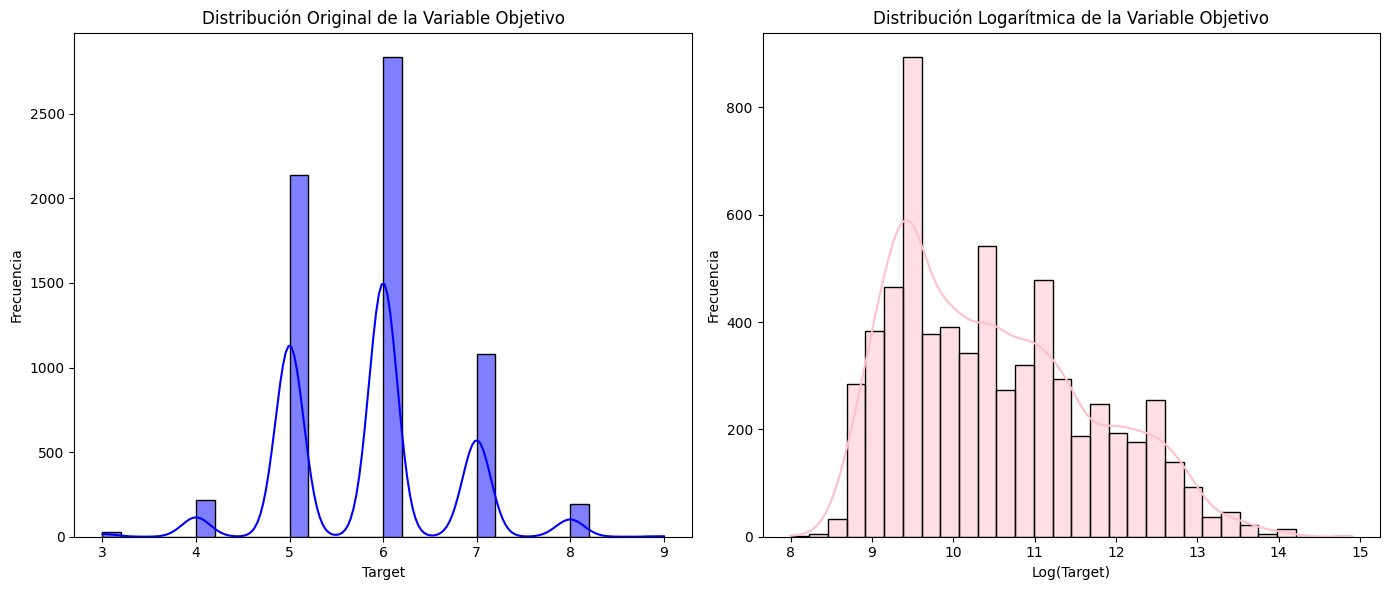

In [15]:
# Crear una figura con dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Visualización de la distribución original
sns.histplot(c_target,  bins=30, kde=True, ax=ax[0], color= 'blue')
ax[0].set_title('Distribución Original de la Variable Objetivo')
ax[0].set_xlabel('Target')
ax[0].set_ylabel('Frecuencia')

# Visualización de la distribución logarítmica
sns.histplot(r_target, bins=30, kde=True, ax=ax[1], color = 'pink')
ax[1].set_title('Distribución Logarítmica de la Variable Objetivo')
ax[1].set_xlabel('Log(Target)')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

Utilizo las funciones hechas en TC para encontrar y visualizar las features significativas en relación con el target.

In [17]:
tb.get_features_num_regression(wine_data,'quality',umbral_corr=0.05)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'free sulfur dioxide',
 'density',
 'alcohol']

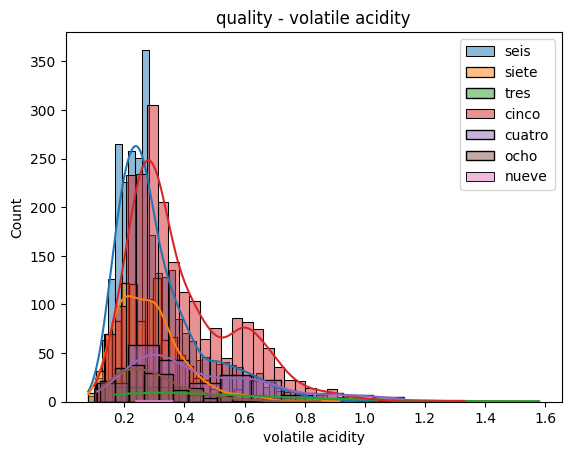

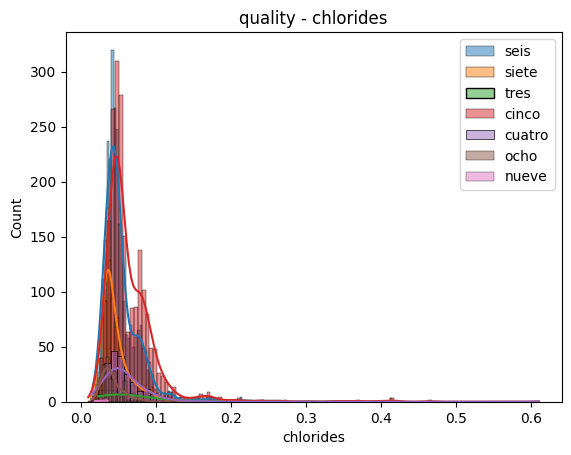

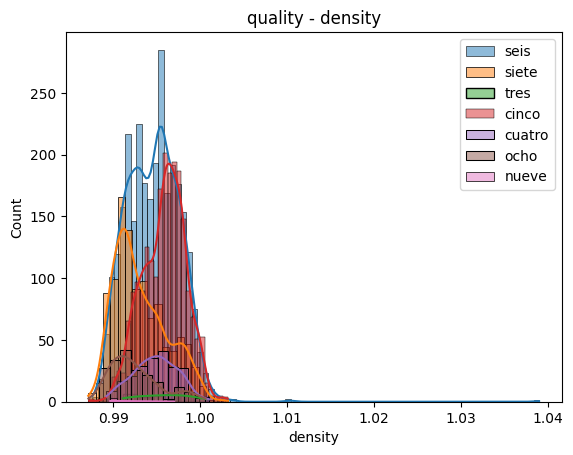

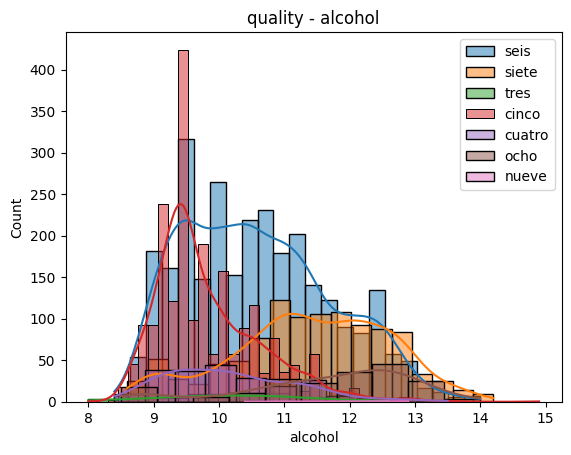

In [40]:
for col in X_c:
    for z in y_c.unique():
        sns.histplot(wine_data[y_c == z][col], kde = True, label =str(z))
    plt.title(f'quality - {col}')
    plt.legend()
    plt.show()

Una vez he encontrado las features que me interesan las separo del target.

In [41]:
# Separar características y variable objetivo
X_c = wine_data[['volatile acidity', 'chlorides', 'density', 'alcohol']]
y_c = c_target

Preparo un pipeline para el preprocesamiento de datos que será utilizado antes de entrenar un modelo.

In [42]:
# Preprocesamiento: One-Hot Encoding para variables categóricas
numeric_features = X_c.columns
categorical_features = [] # En este caso no hay ya que estamos seleccionando las features con umbral de corr. = 0.2
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

Transformo el target a categorico para poder crear los modelos de clasificacion.

In [43]:
# Transformar la variable 'calidad' a categórica
bins = [0,3,4, 5,6, 7,8,9]  # Definir los límites de los bins
labels = ['tres','cuatro','cinco','seis','siete','ocho','nueve']  # Etiquetas para cada bin
y_c = pd.cut(wine_data['quality'], bins=bins, labels=labels)

y_c

0         seis
1         seis
2        siete
3         tres
4         seis
         ...  
6492     cinco
6493     cinco
6494     cinco
6495     cinco
6496    cuatro
Name: quality, Length: 6497, dtype: category
Categories (7, object): ['tres' < 'cuatro' < 'cinco' < 'seis' < 'siete' < 'ocho' < 'nueve']

Realizo el train y test split.

In [44]:
# Dividir en conjunto de entrenamiento y prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42, stratify=y_c)

Aqui probé una técnica de sobremuestreo aleatorio para equilibrar las clases, pero al tener tan pocos datos las clases minoritarias son muchas las muestras que habría que inventar, por lo que aunque los resultados mejoran mucho, demasiado, apunta que se produce overfiting. Dejo el codigo comentado para avanzar en el proyecto con los datos que tenemos.

In [45]:
# from imblearn.over_sampling import RandomOverSampler

# # Crear instancia de RandomOverSampler
# oversampler = RandomOverSampler(random_state=42)

# # Aplicar Random Oversampling al conjunto de entrenamiento
# X_train_c, y_train_c = oversampler.fit_resample(X_train_c, y_train_c)


Utilizo KNN como modelo baseline, itero sobre los valores de K para encontrar el mejor valor posible.

In [46]:
# Crear el pipeline de KNN con preprocesamiento
k_values = range(1, 21)
recall_means = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])
    
    # Validación cruzada
    recall_scores = cross_val_score(pipeline, X_train_c, y_train_c, cv=4, scoring='recall_macro')
    recall_means[k] = recall_scores.mean()

# Imprimir los resultados
for k, recall_mean in recall_means.items():
    print(f"Recall medio KNN (K={k}): {recall_mean}")

Recall medio KNN (K=1): 0.3188710825744803
Recall medio KNN (K=2): 0.27814465260728694
Recall medio KNN (K=3): 0.2573262041110158
Recall medio KNN (K=4): 0.245186855021512
Recall medio KNN (K=5): 0.24444150588579078
Recall medio KNN (K=6): 0.24176332973287046
Recall medio KNN (K=7): 0.2390307148948788
Recall medio KNN (K=8): 0.2384154395159078
Recall medio KNN (K=9): 0.23660004035506485
Recall medio KNN (K=10): 0.2327689500184746
Recall medio KNN (K=11): 0.23097192669790667
Recall medio KNN (K=12): 0.2282534533120963
Recall medio KNN (K=13): 0.23017434010554075
Recall medio KNN (K=14): 0.22732689064190909
Recall medio KNN (K=15): 0.22740010936181967
Recall medio KNN (K=16): 0.22486834679504508
Recall medio KNN (K=17): 0.22345240764529775
Recall medio KNN (K=18): 0.2250115027929407
Recall medio KNN (K=19): 0.22581546022332324
Recall medio KNN (K=20): 0.22658086097120478


Los resultados son muy pobres, pero con los datos que tenemos no podemos esperar mucho más. Cogiendo K=1 tendriamos aún asi un resultado bastante malo, y corriendo riesgo de overfting.

Continuamos definiendo, entrenando y evaluando 3 modelos más de clasificación utilizando validación cruzada.

In [47]:
# Definir modelos
models = {
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Diccionario para almacenar los resultados de recall medio
recall_means = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    # Validación cruzada
    recall_scores = cross_val_score(pipeline, X_train_c, y_train_c, cv=4, scoring='recall_macro')
    recall_means[name] = recall_scores.mean()

# Imprimir los resultados
for name, recall_mean in recall_means.items():
    print(f"Recall medio {name}: {recall_mean}")


Recall medio KNN: 0.2327689500184746
Recall medio Random Forest: 0.324039337403045
Recall medio Logistic Regression: 0.2097458482805147
Recall medio Gradient Boosting: 0.2524158671893648


Seguimos viendo unos resultado bastante bajos, siendo random forest el mejor procederé a optimizar sus hiperparámetros.

In [48]:
# Definir los hiperparámetros a ajustar para Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Crear pipeline para Random Forest
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

# GridSearchCV para ajustar los hiperparámetros del Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=4, scoring='recall_macro', n_jobs=-1)

# Entrenar el modelo Random Forest con GridSearchCV
grid_search_rf.fit(X_train_c, y_train_c)

# Imprimir los mejores parámetros y el recall medio
print(f"Mejores parámetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Recall medio Random Forest: {grid_search_rf.best_score_}")


Mejores parámetros para Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Recall medio Random Forest: 0.32670670155023196


Obtenemos los mejores parametros para RF y procedemos a definirlo, entrenarlo y evaluarlo, buscamos el recall medio pero quiero ver las demás métricas.

In [49]:
# Definir modelos
models = {
    # "KNN": KNeighborsClassifier(n_neighbors=20),
    "Random Forest": RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300),
    # "Logistic Regression": LogisticRegression(random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=300,
    #                        random_state=42) # Como curiosidad tambien hice una búsqueda de mejores hiperparámetros para este modelo.
}

# Crear las funciones de puntuación personalizada con zero_division=0
precision_macro = make_scorer(precision_score, average='macro', zero_division=0)
recall_macro = make_scorer(recall_score, average='macro', zero_division=0)
f1_macro = make_scorer(f1_score, average='macro', zero_division=0)

# Métricas a evaluar
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision_macro': precision_macro,
    'recall_macro': recall_macro,
    'f1_macro': f1_macro
}

# Diccionario para almacenar los resultados de las métricas
metrics_results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    # Validación cruzada con múltiples métricas
    results = cross_validate(pipeline, X_train_c, y_train_c, cv=4, scoring=scoring_metrics)
    # Guardar resultados en el diccionario
    metrics_results[name] = results

# Imprimir los resultados de cada métrica para cada modelo
for name, metrics in metrics_results.items():
    print(f"Resultados para {name}:")
    for score_name in scoring_metrics:
        average_score = metrics[f"test_{score_name}"].mean()
        print(f"{score_name}: {average_score:.10f}")
    print("\n")

Resultados para Random Forest:
accuracy: 0.6205516077
precision_macro: 0.4212904572
recall_macro: 0.3212472419
f1_macro: 0.3436796815




Veamos ahora el informe de clasificación.

In [51]:
# Evaluar cada modelo contra el conjunto de datos de prueba
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train_c, y_train_c)  # Entrenar con el conjunto de datos remuestreado
    
    # Hacer predicciones sobre el conjunto de prueba
    y_pred = pipeline.predict(X_test_c)
    
    # Generar el informe de clasificación
    print(f"Informe de clasificación para {name}:")
    print(classification_report(y_test_c, y_pred, zero_division=0))
    print("\n")

# Evaluar el mejor modelo Random Forest con los mejores hiperparámetros encontrados por GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Hacer predicciones sobre el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test_c)

# Generar el informe de clasificación para el mejor modelo Random Forest
print(f"Informe de clasificación para el mejor Random Forest:")
print(classification_report(y_test_c, y_pred_rf, zero_division=0))


Informe de clasificación para Random Forest:
              precision    recall  f1-score   support

       cinco       0.68      0.74      0.71       428
      cuatro       0.71      0.12      0.20        43
       nueve       0.00      0.00      0.00         1
        ocho       0.69      0.28      0.40        39
        seis       0.64      0.71      0.67       567
       siete       0.63      0.53      0.58       216
        tres       0.00      0.00      0.00         6

    accuracy                           0.65      1300
   macro avg       0.48      0.34      0.37      1300
weighted avg       0.65      0.65      0.64      1300



Informe de clasificación para el mejor Random Forest:
              precision    recall  f1-score   support

       cinco       0.70      0.75      0.72       428
      cuatro       0.71      0.12      0.20        43
       nueve       0.00      0.00      0.00         1
        ocho       0.73      0.28      0.41        39
        seis       0.63      0.

Tenemos unos resultados decentes en las clases mayoritarias, lo que no son malos resultados teniendo en cuenta los datos con los que contamos.

Vamos a visualizar la matriz de confusión.

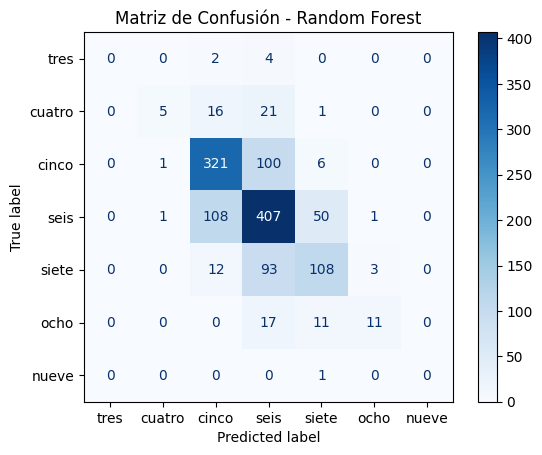

In [52]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test_c, y_pred_rf, labels=y_c.cat.categories)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_c.cat.categories)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Random Forest')
plt.show()

En conclusión, dado el bajo recall medio que he logrado no creo que la empresa este interesada en el dadas las perdidas que podría suponer. 
Quizá realizando una inversión en I+D podriamos mejorar la calidad de los datos y afinar nuestros sistemas.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

Empezamos de nuevo buscando y visualizando las features significativas en relacion a nuestro target.

In [53]:
tb.get_features_num_regression(wine_data,'alcohol',umbral_corr=0.1)

['residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'quality']

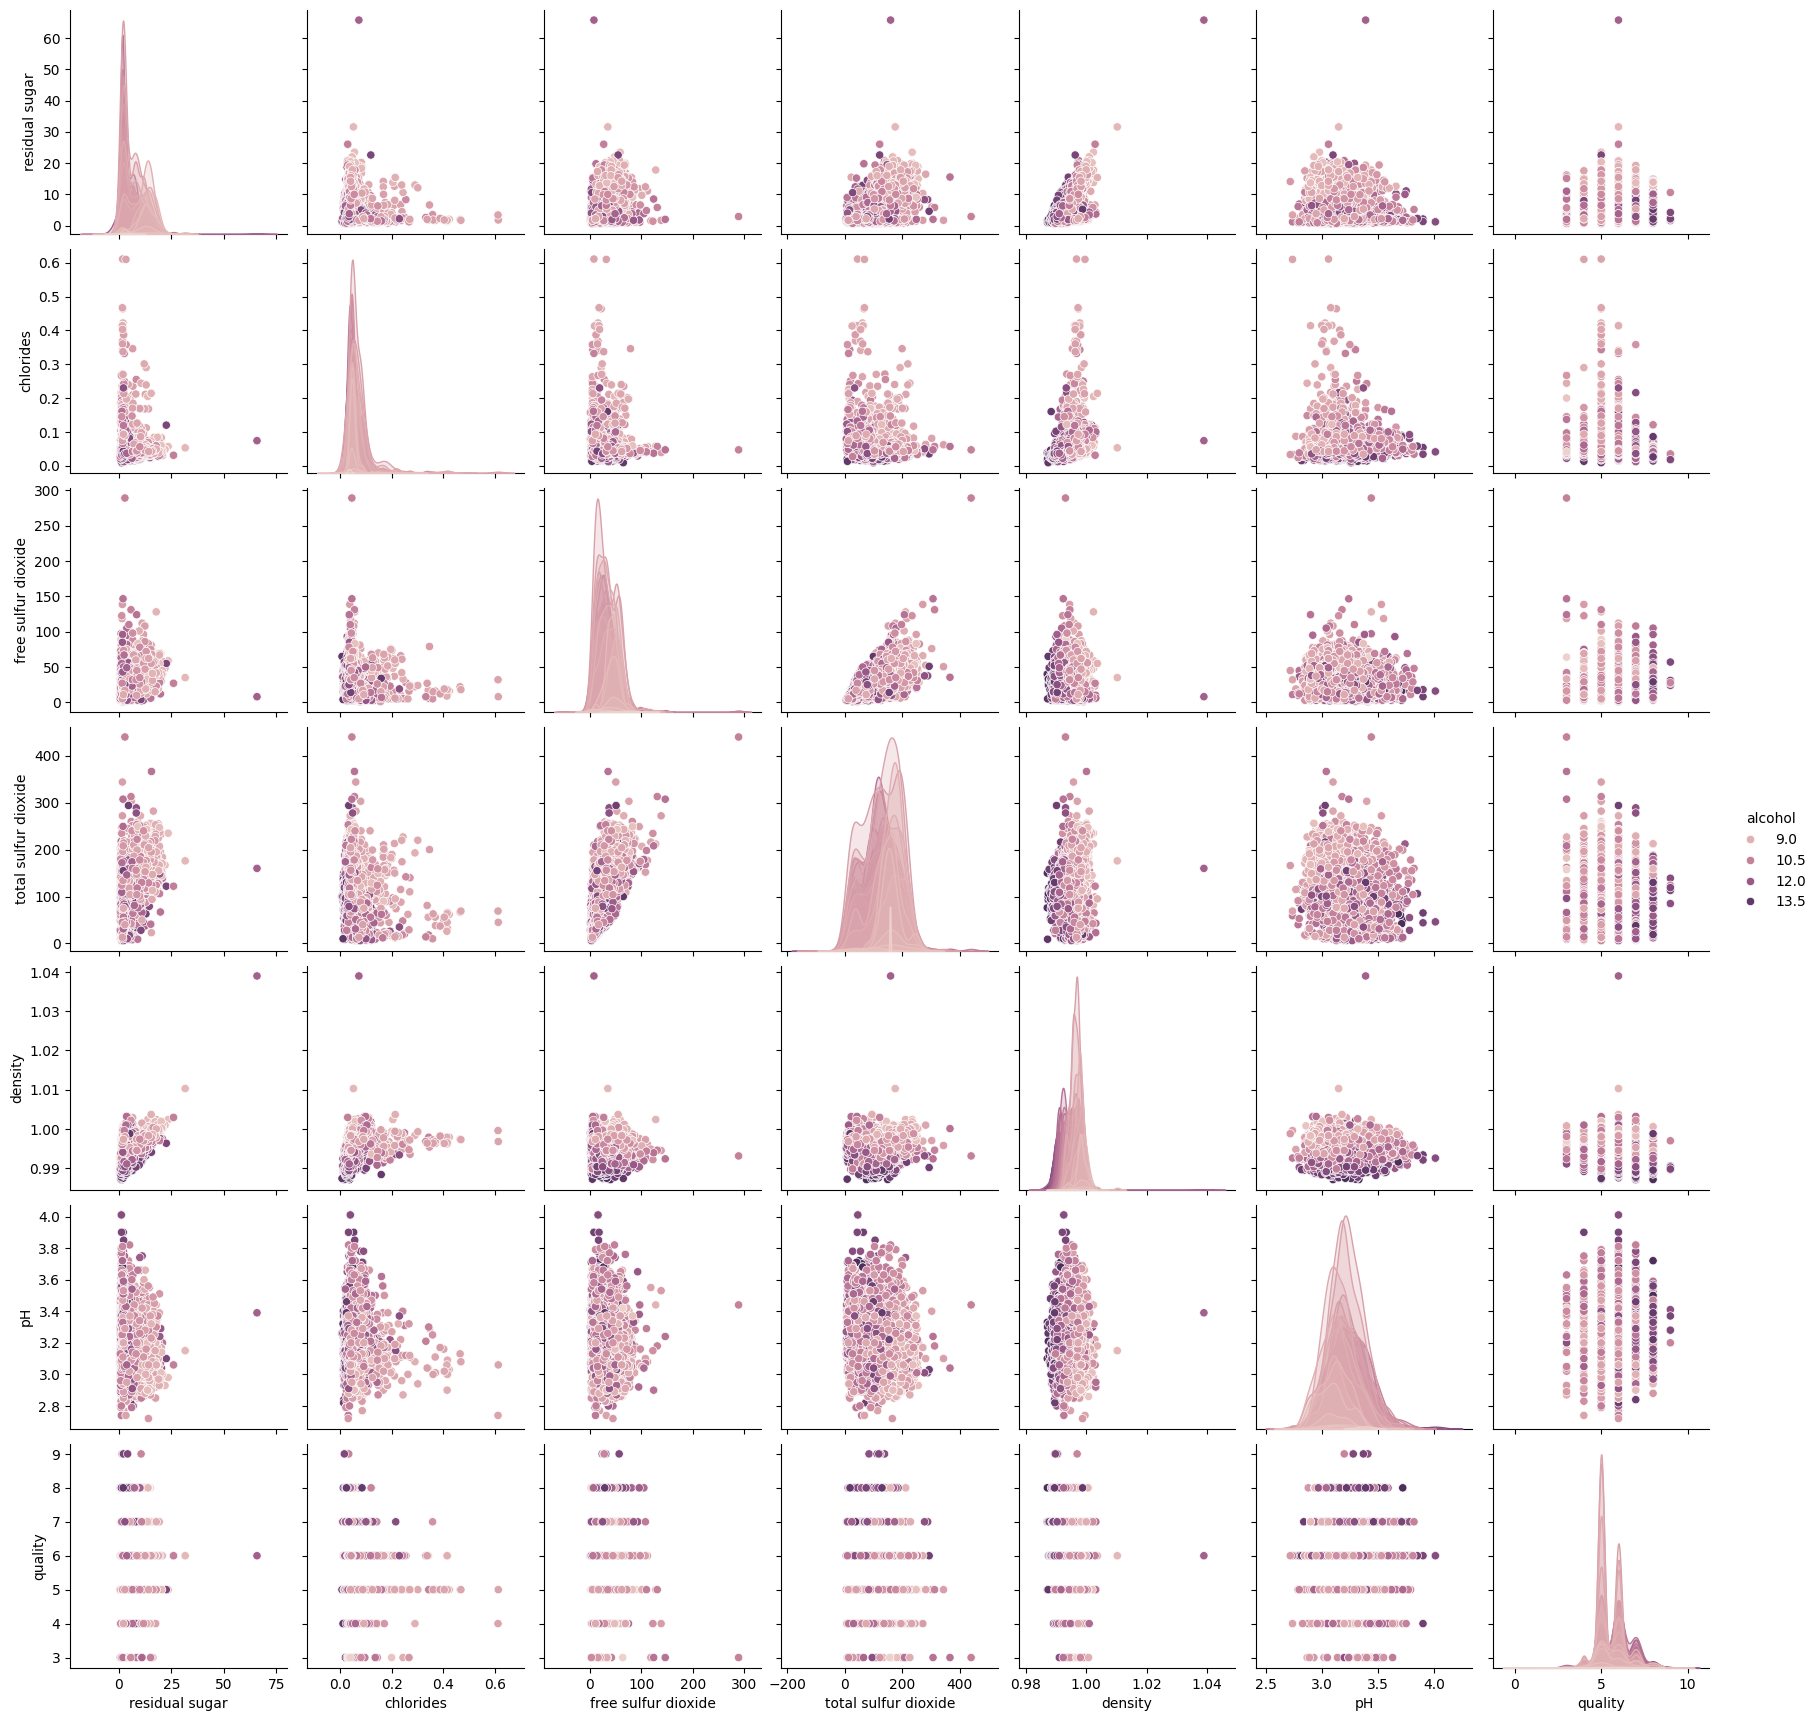

In [54]:
tb.plot_features_num_regression(wine_data,'alcohol',umbral_corr=0.1)

Una vez he encontrado las features que me interesan las separo del target.

In [55]:
# Seleccionar características específicas incluyendo la clase y calidad
features = ['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','quality']
X_r = wine_data[features]
y_r = r_target

Preparo un pipeline para el preprocesamiento de datos que será utilizado antes de entrenar un modelo.

In [57]:
# Preprocesamiento: Escalar características numéricas
numeric_features = features  # Todas las características son numéricas

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

Vamos a por el trains y test split.

In [58]:
# Dividir en conjunto de entrenamiento y prueba
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

Defino, entreno y evaluo con validación cruzada todos los modelos en busca del r2, usamos el knn como baseline, pero por agilizar código los haré todos a la vez.

In [59]:
# Definir modelos
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor()
}

# Diccionario para almacenar los resultados de la métrica (R2)
r2_scores = {}

# Entrenar y evaluar cada modelo
for name, model in regression_models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    
    # Validación cruzada con R2 score
    scores = cross_val_score(pipeline, X_train_r, y_train_r, cv=4, scoring='r2')
    r2_scores[name] = scores.mean()

# Imprimir los resultados de R2 score para cada modelo
for name, r2_scor in r2_scores.items():
    print(f"R2 score medio {name}: {r2_scor:.3f}")

R2 score medio Linear Regression: 0.619
R2 score medio Random Forest: 0.829
R2 score medio Gradient Boosting: 0.778
R2 score medio KNN Regressor: 0.720


Tenemos mejores resultados que en el sistema de clasificación, sin embargo Random forest mantiene el liderazgo.

Procedo a realizar una busqueda de los mejores hiperparámetros, entrenarlo y ver como mejora el r2.

In [60]:
# Definir los hiperparámetros a ajustar para Random Forest Regressor
param_grid_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Crear pipeline para Random Forest Regressor
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])

# GridSearchCV para ajustar los hiperparámetros del Random Forest Regressor
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=4, scoring='r2', n_jobs=-1)

# Entrenar el modelo Random Forest Regressor con GridSearchCV
grid_search_rf.fit(X_train_r, y_train_r)

# Imprimir los mejores parámetros y el R2 score medio
print(f"Mejores parámetros para Random Forest Regressor: {grid_search_rf.best_params_}")
print(f"R2 score medio Random Forest Regressor: {grid_search_rf.best_score_}")

Mejores parámetros para Random Forest Regressor: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
R2 score medio Random Forest Regressor: 0.8307242042853333


Vemos una mejora muy leve, apenas significativa.

Acabamos evaluando el modelo sobre el conjunto de prueba y calculamos y vemos las metricas MSE MAE y r2 score.

In [61]:
# Evaluar el mejor modelo Random Forest Regressor con los mejores hiperparámetros encontrados por GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Hacer predicciones sobre el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test_r)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test_r, y_pred_rf)
mae = mean_absolute_error(y_test_r, y_pred_rf)
r2 = r2_score(y_test_r, y_pred_rf)  

print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R2 Score: {r2:.3f}")


MSE: 0.223
MAE: 0.314
R2 Score: 0.842
